In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

### Loading Iris dataset ###

In [2]:
iris = load_iris()

In [3]:
df = pd.DataFrame(iris.data)

In [4]:
df.columns = iris.feature_names

In [5]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### using three classification models ###

In [6]:
lor = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [7]:
estimators = [('logistic regression',lor),('k-nearest neighbors',knn),('random forest',rf)]

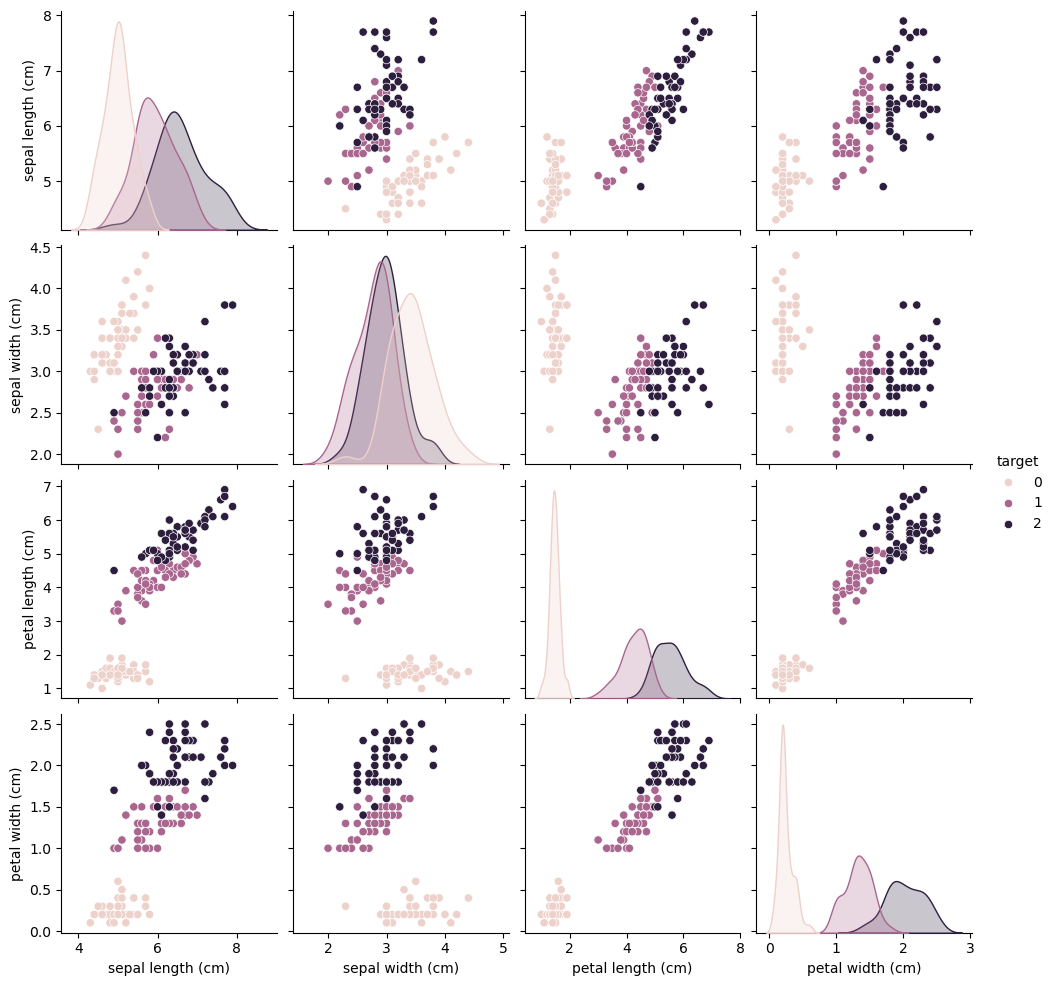

In [8]:
import seaborn as sns
sns.pairplot(df,hue="target")

### taking only sepal length and sepal width with only target as 1,2 so that the classification becomes difficult (refer the above graph for context)

In [9]:
newdf = df[df['target']!=0][['sepal length (cm)','sepal width (cm)','target']]

In [10]:
newdf

,sepal length (cm),sepal width (cm),target
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


### getting the x and y (features and targets from the new datafram)

In [11]:
x = newdf.iloc[:,0:2]
y = newdf.iloc[:,2]

In [12]:
x.shape

(100, 2)

In [13]:
y.shape

(100,)

In [14]:
x

,sepal length (cm),sepal width (cm)
50,7.0,3.2
51,6.4,3.2
52,6.9,3.1
53,5.5,2.3
54,6.5,2.8
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [15]:
y

50     1
51     1
52     1
53     1
54     1
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 100, dtype: int64

### checking the cross val score for every model independently

In [16]:
for estimator in estimators:
    score = cross_val_score(estimator[1],x,y,cv=10,scoring="accuracy")
    print(f'{estimator[0]}: {np.round(np.mean(score),2)}')

logistic regression: 0.75
k-nearest neighbors: 0.61
random forest: 0.61


### using voting classifier with all the 3 model combined with voting as hard 

In [17]:
from sklearn.ensemble import VotingClassifier

In [18]:
reg = VotingClassifier(estimators=estimators,voting='hard')

In [19]:
reg.fit(x,y)

VotingClassifier(estimators=[('logistic regression', LogisticRegression()),
                             ('k-nearest neighbors', KNeighborsClassifier()),
                             ('random forest', RandomForestClassifier())])

In [20]:
score = cross_val_score(reg,x,y,cv=10,scoring='accuracy')
print(f"voting ensemble with hard voting : {np.round(np.mean(score),2)}")

voting ensemble with hard voting : 0.68


### for soft voting

In [21]:
reg2 = VotingClassifier(estimators=estimators,voting='soft')
score2 = cross_val_score(reg2,x,y,cv=10,scoring='accuracy')
print(f"voting ensemble with soft voting : {np.round(np.mean(score2),2)}")

voting ensemble with soft voting : 0.65


### using weighted voting classification with weights being either 1,2,3

In [22]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            reg3 = VotingClassifier(estimators = estimators, voting='soft', weights=[i,j,k])
            score = cross_val_score(reg3,x,y,cv=10,scoring='accuracy')

            print(f"{i , j , k}: {np.round(np.mean(score),2)}")

(1, 1, 1): 0.66
(1, 1, 2): 0.64
(1, 1, 3): 0.62
(1, 2, 1): 0.63
(1, 2, 2): 0.63
(1, 2, 3): 0.64
(1, 3, 1): 0.64
(1, 3, 2): 0.62
(1, 3, 3): 0.62
(2, 1, 1): 0.68
(2, 1, 2): 0.67
(2, 1, 3): 0.63
(2, 2, 1): 0.68
(2, 2, 2): 0.66
(2, 2, 3): 0.65
(2, 3, 1): 0.65
(2, 3, 2): 0.63
(2, 3, 3): 0.66
(3, 1, 1): 0.71
(3, 1, 2): 0.69
(3, 1, 3): 0.67
(3, 2, 1): 0.7
(3, 2, 2): 0.67
(3, 2, 3): 0.66
(3, 3, 1): 0.69
(3, 3, 2): 0.66
(3, 3, 3): 0.66


In [23]:
from sklearn.svm import SVC

In [24]:
from sklearn.datasets import make_classification

### using svm classifier on the sample data we have created and using voting classifier for each of them to show that it can increase the accuracy 

In [25]:
x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

In [26]:
svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

In [27]:
estimators2 = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

### accuracy for each svm independently

In [28]:
for estimator in estimators2:
    score = cross_val_score(estimator[1],x,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(score),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [29]:
svmenm = VotingClassifier(estimators = estimators2, voting="soft")

### accuracy of voting classifier when every svm is merged or grouped by voting classifier

In [30]:
score = cross_val_score(svmenm,x,y,cv = 10, scoring="accuracy")
print(np.round(np.mean(score),2))

0.93


### checking the accuracy for 3 svms using weightage voting classifier

In [31]:
estimators = estimators2 = [('svm1',svm1),('svm2',svm2),('svm3',svm3)]
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            reg = VotingClassifier(estimators=estimators,voting='hard',weights=[i,j,k])
            score = cross_val_score(reg,x,y,cv=10,scoring='accuracy')

            print(f"{i ,j, k} : {np.round(np.mean(score),2)}")

(1, 1, 1) : 0.91
(1, 1, 2) : 0.9
(1, 1, 3) : 0.89
(1, 2, 1) : 0.89
(1, 2, 2) : 0.91
(1, 2, 3) : 0.9
(1, 3, 1) : 0.85
(1, 3, 2) : 0.89
(1, 3, 3) : 0.91
(2, 1, 1) : 0.88
(2, 1, 2) : 0.91
(2, 1, 3) : 0.9
(2, 2, 1) : 0.91
(2, 2, 2) : 0.91
(2, 2, 3) : 0.91
(2, 3, 1) : 0.89
(2, 3, 2) : 0.91
(2, 3, 3) : 0.91
(3, 1, 1) : 0.85
(3, 1, 2) : 0.88
(3, 1, 3) : 0.91
(3, 2, 1) : 0.88
(3, 2, 2) : 0.91
(3, 2, 3) : 0.91
(3, 3, 1) : 0.91
(3, 3, 2) : 0.91
(3, 3, 3) : 0.91
